In [2]:
#Data Analysis
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Data Preprocessing and Feature Engineering
from textblob import TextBlob
import re
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

#Model Selection and Validation
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score


In [23]:
train_tweets = pd.read_csv('train.csv')
test_tweets = pd.read_csv('test.csv')

In [24]:
train_tweets.dropna(subset = ["tweet"], inplace=True)


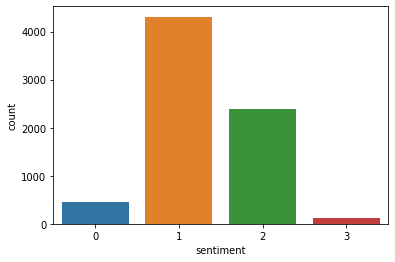

In [25]:
sns.countplot(x= 'sentiment',data = train_tweets)

In [26]:
def form_sentence(tweet):
    tweet_blob = TextBlob(tweet)
    return ' '.join(tweet_blob.words)

print(form_sentence(train_tweets['tweet'].iloc[10]))
print(train_tweets['tweet'].iloc[10])


RT mention Official SXSW App Û÷SXSW GOÛª bit.ly/hmiiGa android iphone ipad
RT @mention Official #SXSW App Û÷SXSW GOÛª bit.ly/hmiiGa #android #iphone #ipad


In [27]:
def no_user_alpha(tweet):
    tweet_list = [ele for ele in tweet.split() if ele != 'user']
    clean_tokens = [t for t in tweet_list if re.match(r'[^\W\d]*$', t)]
    clean_s = ' '.join(clean_tokens)
    clean_mess = [word for word in clean_s.split() if word.lower() not in stopwords.words('english')]
    return clean_mess
print(no_user_alpha(form_sentence(train_tweets['tweet'].iloc[10])))
print(train_tweets['tweet'].iloc[10])


['RT', 'mention', 'Official', 'SXSW', 'App', 'android', 'iphone', 'ipad']
RT @mention Official #SXSW App Û÷SXSW GOÛª bit.ly/hmiiGa #android #iphone #ipad


In [28]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\rkbis\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [29]:
def normalization(tweet_list):
        lem = WordNetLemmatizer()
        normalized_tweet = []
        for word in tweet_list:
            normalized_text = lem.lemmatize(word,'v')
            normalized_tweet.append(normalized_text)
        return normalized_tweet
    
tweet_list = 'I was playing with my friends with whom I used to play, when you called me yesterday'.split()
print(normalization(tweet_list))


['I', 'be', 'play', 'with', 'my', 'friends', 'with', 'whom', 'I', 'use', 'to', 'play,', 'when', 'you', 'call', 'me', 'yesterday']


In [30]:
pipeline = Pipeline([
    ('bow',CountVectorizer(analyzer='word')),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [31]:
msg_train, msg_test, label_train, label_test = train_test_split(train_tweets['tweet'], train_tweets['sentiment'], test_size=0.2)
pipeline.fit(msg_train,label_train)
predictions = pipeline.predict(msg_test)
print(classification_report(predictions,label_test))
print(confusion_matrix(predictions,label_test))
print(accuracy_score(predictions,label_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.97      0.63      0.77      1329
           2       0.19      0.70      0.30       126
           3       0.00      0.00      0.00         0

    accuracy                           0.64      1455
   macro avg       0.29      0.33      0.27      1455
weighted avg       0.91      0.64      0.73      1455

[[  0   0   0   0]
 [ 90 842 370  27]
 [ 12  23  88   3]
 [  0   0   0   0]]
0.6391752577319587


C:\Users\rkbis\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
